In [2]:
import pandas as pd
import numpy as np
from collections import Counter

# Load your data
df = pd.read_csv('weighted_symptom_disease_dataset.csv')



In [4]:
df.head()

,abnormal appearing skin,abnormal involuntary movements,abusing alcohol,ache all over,acne or pimples,allergic reaction,ankle pain,ankle swelling,apnea,arm pain,...,vaginal discharge,vaginal pain,vomiting,vomiting blood,warts,weakness,wheezing,wrist pain,wrist swelling,disease
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,hypertension of pregnancy
1,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,1,hypertension of pregnancy
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,hypertension of pregnancy
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,1,hypertension of pregnancy
4,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0,1,0,hypertension of pregnancy


In [5]:
df['disease'].unique()

array(['hypertension of pregnancy', 'heart attack', 'stroke', 'flu',
       'pneumonia', 'asthma', 'diabetes', 'obesity', 'anemia',
       'iron deficiency anemia', 'vitamin d deficiency',
       'vitamin b12 deficiency', 'hyperlipidemia',
       'coronary atherosclerosis', 'heart failure',
       'rheumatoid arthritis', 'osteoarthritis', 'eczema', 'psoriasis',
       'chickenpox', 'tuberculosis', 'meningitis',
       'urinary tract infection', 'kidney stone', 'depression', 'anxiety',
       'bipolar disorder', 'schizophrenia', 'autism', 'thyroid disease',
       'hypothyroidism', 'hyperthyroidism'], dtype=object)

In [6]:
common_diseases = [
    'flu',
    'pneumonia',
    'asthma',
    'diabetes',
    'obesity',
    'anemia',
    'iron deficiency anemia',
    'vitamin d deficiency',
    'vitamin b12 deficiency',
    'hyperlipidemia',
    'heart attack',
    'coronary atherosclerosis',
    'urinary tract infection',
    'kidney stone',
    'tuberculosis',
    'depression',
    'anxiety',
    'hypothyroidism',
    'hyperthyroidism',
    'eczema',
    'psoriasis'
]


In [8]:
df_common = df[df['disease'].isin(common_diseases)].copy()


In [9]:
df=df_common

In [10]:
df.columns.value_counts()

abnormal appearing skin    1
nosebleed                  1
pain of the anus           1
painful sinuses            1
painful urination          1
                          ..
foot or toe pain           1
foot or toe swelling       1
frequent urination         1
groin pain                 1
disease                    1
Name: count, Length: 151, dtype: int64

In [11]:
# Basic dataset info
print("\n=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Symptom columns: {df.shape[1] - 1}")
print(f"Target column: 'disease'")

print("\n=== COLUMN TYPES ===")
print(df.dtypes.value_counts())

print("\n=== MISSING VALUES ===")
print(df.isnull().sum().sum(), "total missing values")

print("\n=== TARGET DISTRIBUTION ===")
target_counts = df['disease'].value_counts()
print(f"Number of unique diseases: {len(target_counts)}")
print(f"Min samples per disease: {target_counts.min()}")
print(f"Max samples per disease: {target_counts.max()}")
print(f"Average samples per disease: {target_counts.mean():.2f}")




=== DATASET OVERVIEW ===
Shape: 14800 rows, 151 columns
Symptom columns: 150
Target column: 'disease'

=== COLUMN TYPES ===
int64     150
object      1
Name: count, dtype: int64

=== MISSING VALUES ===
0 total missing values

=== TARGET DISTRIBUTION ===
Number of unique diseases: 21
Min samples per disease: 400
Max samples per disease: 2000
Average samples per disease: 704.76


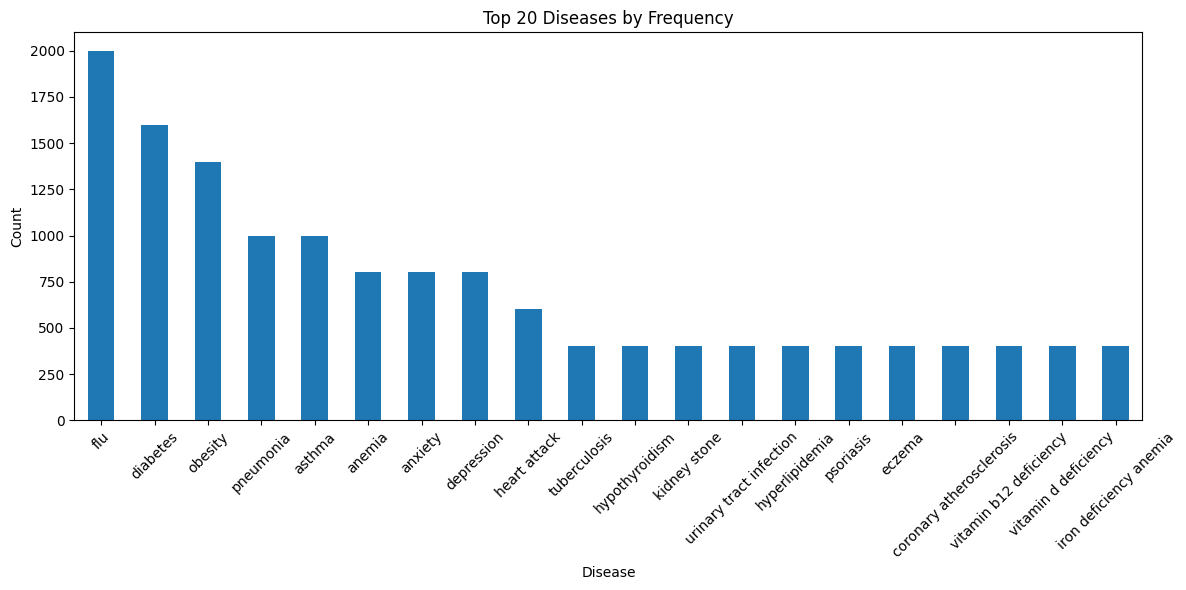

In [12]:
import matplotlib.pyplot as plt
# Plot disease distribution
plt.figure(figsize=(12, 6))
target_counts.head(20).plot(kind='bar')
plt.title('Top 20 Diseases by Frequency')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
X=df.drop(columns=['disease'])
y=df['disease']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


=== FEATURE SELECTION ===
Performing feature selection using Extra Trees...
Selected top 150 features


<Figure size 1200x800 with 0 Axes>

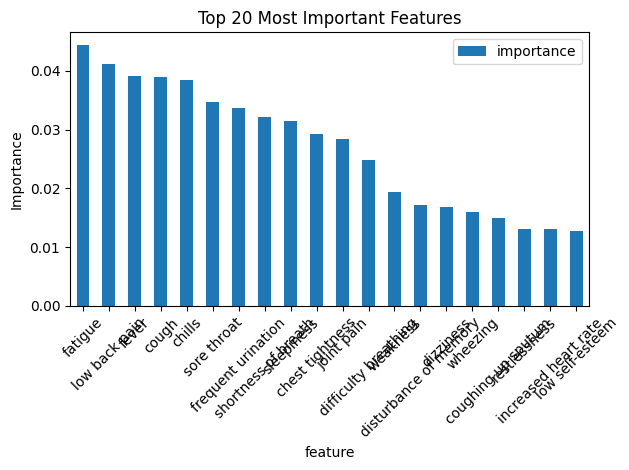

Training set after feature selection: (11840, 150)
Testing set after feature selection: (2960, 150)


In [15]:
# Feature Selection
print("\n=== FEATURE SELECTION ===")

# Method 1: Tree-based feature importance
print("Performing feature selection using Extra Trees...")
feature_selector = ExtraTreesClassifier(n_estimators=100, random_state=42)
feature_selector.fit(X_train, y_train)

# Get feature importances
feature_importances = feature_selector.feature_importances_
feature_names = X_train.columns

# Create DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

# Select top 150 features
top_features = feature_importance_df.head(150)['feature'].values
print(f"Selected top {len(top_features)} features")

# Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance_df.head(20).plot(kind='bar', x='feature', y='importance')
plt.title('Top 20 Most Important Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Select features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

print(f"Training set after feature selection: {X_train_selected.shape}")
print(f"Testing set after feature selection: {X_test_selected.shape}")



In [16]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import numpy as np

print("Original class distribution:", Counter(y_train))



Original class distribution: Counter({'flu': 1600, 'diabetes': 1280, 'obesity': 1120, 'pneumonia': 800, 'asthma': 800, 'depression': 640, 'anxiety': 640, 'anemia': 640, 'heart attack': 480, 'psoriasis': 320, 'iron deficiency anemia': 320, 'urinary tract infection': 320, 'coronary atherosclerosis': 320, 'vitamin b12 deficiency': 320, 'eczema': 320, 'hypothyroidism': 320, 'hyperlipidemia': 320, 'hyperthyroidism': 320, 'vitamin d deficiency': 320, 'kidney stone': 320, 'tuberculosis': 320})


In [17]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import numpy as np

# Encode labels before resampling
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("Original class distribution:", Counter(y_train))

# SMOTE + undersampling
over = SMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto', random_state=42)

imbalance_pipeline = Pipeline([
    ('over', over),
    ('under', under)
])

# Apply resampling to encoded labels
X_resampled, y_resampled = imbalance_pipeline.fit_resample(X_train_selected, y_train_encoded)

print(f"\nTraining set after resampling: {X_resampled.shape}")
print(f"Unique classes after resampling: {len(np.unique(y_resampled))}")
print("New class distribution:", Counter(y_resampled))


Original class distribution: Counter({'flu': 1600, 'diabetes': 1280, 'obesity': 1120, 'pneumonia': 800, 'asthma': 800, 'depression': 640, 'anxiety': 640, 'anemia': 640, 'heart attack': 480, 'psoriasis': 320, 'iron deficiency anemia': 320, 'urinary tract infection': 320, 'coronary atherosclerosis': 320, 'vitamin b12 deficiency': 320, 'eczema': 320, 'hypothyroidism': 320, 'hyperlipidemia': 320, 'hyperthyroidism': 320, 'vitamin d deficiency': 320, 'kidney stone': 320, 'tuberculosis': 320})

Training set after resampling: (33600, 150)
Unique classes after resampling: 21
New class distribution: Counter({0: 1600, 1: 1600, 2: 1600, 3: 1600, 4: 1600, 5: 1600, 6: 1600, 7: 1600, 8: 1600, 9: 1600, 10: 1600, 11: 1600, 12: 1600, 13: 1600, 14: 1600, 15: 1600, 16: 1600, 17: 1600, 18: 1600, 19: 1600, 20: 1600})


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

print("\n=== MODEL TRAINING ===")

# Encode labels before training/testing
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    #'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    #'AdaBoost': AdaBoostClassifier(random_state=42)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Fit on resampled encoded data
    model.fit(X_resampled, y_resampled)

    # Predict on test data
    y_pred_encoded = model.predict(X_test_selected)

    # Compute metrics (numeric form)
    accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
    precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)
    recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)
    f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted', zero_division=0)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

    # Optional readable report
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred_encoded, target_names=le.classes_))

# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['f1'])
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name}")



=== MODEL TRAINING ===

Training Random Forest...
Random Forest - Accuracy: 0.8797, F1-Score: 0.8706

Classification Report:
                          precision    recall  f1-score   support

                  anemia       0.80      0.98      0.88       160
                 anxiety       0.62      0.76      0.68       160
                  asthma       0.96      1.00      0.98       200
coronary atherosclerosis       0.87      0.82      0.85        80
              depression       0.94      0.94      0.94       160
                diabetes       0.87      0.94      0.90       320
                  eczema       0.87      0.89      0.88        80
                     flu       0.92      1.00      0.96       400
            heart attack       0.99      0.98      0.99       120
          hyperlipidemia       0.81      0.86      0.84        80
         hyperthyroidism       0.19      0.06      0.09        80
          hypothyroidism       0.98      0.59      0.73        80
  iron deficien

In [27]:
print("Diseases used for training:")
print(sorted(le.classes_))

Diseases used for training:
['anemia', 'anxiety', 'asthma', 'coronary atherosclerosis', 'depression', 'diabetes', 'eczema', 'flu', 'heart attack', 'hyperlipidemia', 'hyperthyroidism', 'hypothyroidism', 'iron deficiency anemia', 'kidney stone', 'obesity', 'pneumonia', 'psoriasis', 'tuberculosis', 'urinary tract infection', 'vitamin b12 deficiency', 'vitamin d deficiency']


In [20]:
import numpy as np
import pandas as pd

def predict_disease(symptom_list, best_model, feature_names, label_encoder):
    """
    Predict disease based on a list of symptoms.
    """
    # Clean and normalize input
    symptom_list = [s.strip().lower() for s in symptom_list]

    # Create a zero vector for all features
    input_vector = np.zeros(len(feature_names))

    # Mark 1 for each symptom present
    for i, feature in enumerate(feature_names):
        if feature.lower() in symptom_list:
            input_vector[i] = 1

    # Convert to DataFrame (to match training format)
    input_df = pd.DataFrame([input_vector], columns=feature_names)

    # Predict encoded label
    pred_encoded = best_model.predict(input_df)[0]

    # Decode label back to disease name
    pred_disease = label_encoder.inverse_transform([pred_encoded])[0]

    return pred_disease


In [21]:
# Example test
user_symptoms = [ 'weight gain', 'low back pain', 'dry skin', 'constipation']
predicted_disease = predict_disease(user_symptoms, best_model, X_train_selected.columns, le)

print(f"\n🩺 Based on the symptoms {user_symptoms}, the predicted disease is: {predicted_disease}")



🩺 Based on the symptoms ['weight gain', 'low back pain', 'dry skin', 'constipation'], the predicted disease is: hypothyroidism


In [22]:
user_symptoms = ['fever', 'chills', 'sweating', 'headache', 'muscle pain']
predicted_disease = predict_disease(user_symptoms, best_model, X_train_selected.columns, le)
print(f"{user_symptoms} this Symptoms predict this disease {predicted_disease}")

['fever', 'chills', 'sweating', 'headache', 'muscle pain'] this Symptoms predict this disease tuberculosis


In [23]:
def predict_top3(symptoms, model, all_features, label_encoder):
    # 1. Prepare input vector
    X_input = np.zeros(len(all_features))
    for s in symptoms:
        if s in all_features:
            X_input[all_features.get_loc(s)] = 1
    X_input = X_input.reshape(1, -1)
    
    # 2. Get probabilities
    probs = model.predict_proba(X_input)[0]
    
    # 3. Top 3 indices
    top3_idx = np.argsort(probs)[-3:][::-1]
    
    # 4. Map back to disease names
    return [(label_encoder.classes_[i], probs[i]) for i in top3_idx]

top3 = predict_top3(user_symptoms, best_model, X_train_selected.columns, le)
print("Top 3 predicted diseases:")
for disease, prob in top3:
    print(f"{disease}: {prob:.4f}")


Top 3 predicted diseases:
tuberculosis: 0.2118
pneumonia: 0.1426
flu: 0.0895


In [31]:
import pickle
import os

# Create output directory
os.makedirs("artifacts", exist_ok=True)

# Save the final trained model (replace `rf` with your actual model variable if different)
pickle.dump(best_model, open("artifacts/model.pkl", "wb"))

# Save the fitted LabelEncoder
pickle.dump(le, open("artifacts/label_encoder.pkl", "wb"))

# Save the selected features (so app knows input order)
pickle.dump(top_features, open("artifacts/top_features.pkl", "wb"))

print("✅ Model, label encoder, and feature list saved in /artifacts folder.")


✅ Model, label encoder, and feature list saved in /artifacts folder.
